In [26]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
plt.style.use(["science"])


In [2]:
os.chdir("..")

In [3]:
sys.path.insert(0, os.path.abspath("."))
sys.path.insert(1, os.path.abspath("./CartPoleSimulation/"))

In [4]:
sys.path

['/home/frederikheetmeyer/Desktop/physical-cartpole/Driver',
 '/home/frederikheetmeyer/Desktop/physical-cartpole/Driver/CartPoleSimulation',
 '/home/frederikheetmeyer/Desktop/physical-cartpole/Driver/others',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/frederikheetmeyer/Desktop/physical-cartpole/.env/lib/python3.8/site-packages',
 '/home/frederikheetmeyer/Desktop/physical-cartpole/Driver/CartPoleSimulation/SI_Toolkit/src']

In [5]:
from CartPoleSimulation.CartPole.load import load_csv_recording

/home/frederikheetmeyer/Desktop/physical-cartpole/.env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-09-15 22:01:43.041043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 22:01:43.046774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 22:01:43.046915: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 22:01:43.047304: I tensorflow/core/platfo

In [6]:
# p = load_csv_recording("ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_21-17-09_Swingup.csv")
# p = load_csv_recording("ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_21-17-28_balance.csv")
# p = load_csv_recording("ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_21-17-59_target_following.csv")
p = load_csv_recording("ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_22-00-15_final.csv")

Loading file ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_22-00-15_final.csv


Text(0, 0.5, 'Control u_k')

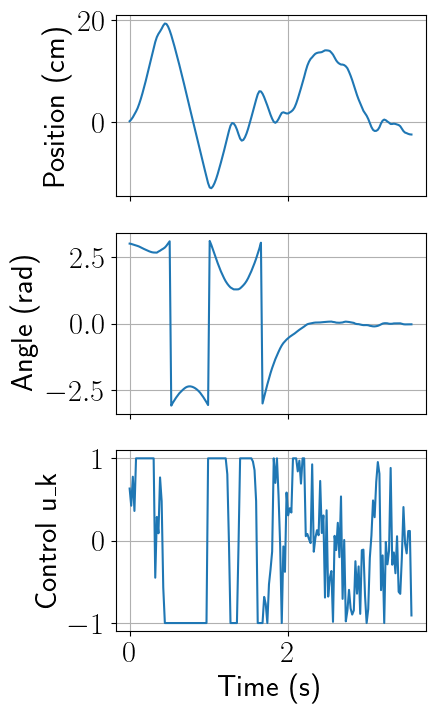

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(4, 8), sharex=True)
ax1.grid(), ax2.grid(), ax3.grid()
x_range = np.arange(23, 200)
# x_range = np.arange(50, 780)
sliced_data = p.iloc[x_range,:]
pos_cm = 100*sliced_data["position"].to_numpy()
angle_rad = sliced_data["angle"].to_numpy()
cmd_normed = sliced_data["Q"].to_numpy()

t_range_ms = sliced_data["time"].to_numpy()
t_range_ms -= t_range_ms[0]

ax1.plot(t_range_ms, pos_cm)
ax2.plot(t_range_ms, angle_rad)
ax3.plot(t_range_ms, cmd_normed)

ax3.set_xlabel("Time (s)")
ax1.set_ylabel("Position (cm)")
ax2.set_ylabel("Angle (rad)")
ax3.set_ylabel(r"Control u_k")